In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils_local import heatmap

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [4]:
# csv_path = "../../results/sslvr-action_classification_finegym_all.csv"
csv_path = "../../results/temporal_granularity_v1.csv"

In [5]:
df = pd.read_csv(csv_path)
df.dropna(inplace=True)

In [6]:
df

,Unnamed: 0,Gym99,Unnamed: 2,Gym288,Unnamed: 4,Vault (6),Unnamed: 6,FX,Unnamed: 8,FX-S1 (11),Unnamed: 10,UB-S1,Unnamed: 12
1,None,89.41,84.4,84.71,50.01,41.26,24.67,79.16,75.88,50.32,44.98,88.44,83.98
2,SeLaVi,88.93,84.75,83.68,52.82,43.72,25.44,80.01,76.04,57.92,50.15,85.11,81.46
3,RSPNet,91.28,87.59,86.11,55.2,43.72,33.35,85.4,82.72,71.3,63.5,89.06,85.12
4,VideoMoCo,90.54,86.36,85.31,54.07,45.74,27.78,84.19,79.52,68.6,60.39,87.9,82.07
5,Pretext-contrast,90.31,85.7,85.42,52.66,46.19,28.48,84.68,81.37,72.84,65.78,90.62,86.24
6,CTP,92.17,88.33,87.33,56.51,44.17,26.83,88.99,86.16,84.68,79.66,92.32,88.44
7,TCLR,91.49,87.97,86.93,55.37,46.19,29.84,87.38,84.25,69.63,61.02,90.48,85.29
8,GDT,90.36,86.46,85.74,55.36,44.62,33.11,85.8,83.64,72.84,65.72,88.17,81.62
9,AVID-CMA,90.56,85.83,85.96,52.46,45.52,30.35,85.98,82.65,75.29,67.15,92.45,81.62
10,Supervised,91.77,88,87.63,58.4,49.33,37.65,88.95,86.09,84.68,80.98,90.55,88.41


### Preprocessing

In [7]:
df = df.rename(
    columns={
        "Unnamed: 0": "Method",
        "Gym99": "Gym99 (video)",
        "Unnamed: 2": "Gym99 (class)",
        "Gym288": "Gym288 (video)",
        "Unnamed: 4": "Gym288 (class)",
        "Vault (6)": "Vault (6) (video)",
        "Unnamed: 6": "Vault (6) (class)",
        "FX": "FX (video)",
        "Unnamed: 8": "FX (class)",
        "FX-S1 (11)": "FX-S1 (11) (video)",
        "Unnamed: 10": "FX-S1 (11) (class)",
        "UB-S1": "UB-S1 (video)",
        "Unnamed: 12": "UB-S1 (class)",
    }
)

In [8]:
df

,Method,Gym99 (video),Gym99 (class),Gym288 (video),Gym288 (class),Vault (6) (video),Vault (6) (class),FX (video),FX (class),FX-S1 (11) (video),FX-S1 (11) (class),UB-S1 (video),UB-S1 (class)
1,None,89.41,84.4,84.71,50.01,41.26,24.67,79.16,75.88,50.32,44.98,88.44,83.98
2,SeLaVi,88.93,84.75,83.68,52.82,43.72,25.44,80.01,76.04,57.92,50.15,85.11,81.46
3,RSPNet,91.28,87.59,86.11,55.2,43.72,33.35,85.4,82.72,71.3,63.5,89.06,85.12
4,VideoMoCo,90.54,86.36,85.31,54.07,45.74,27.78,84.19,79.52,68.6,60.39,87.9,82.07
5,Pretext-contrast,90.31,85.7,85.42,52.66,46.19,28.48,84.68,81.37,72.84,65.78,90.62,86.24
6,CTP,92.17,88.33,87.33,56.51,44.17,26.83,88.99,86.16,84.68,79.66,92.32,88.44
7,TCLR,91.49,87.97,86.93,55.37,46.19,29.84,87.38,84.25,69.63,61.02,90.48,85.29
8,GDT,90.36,86.46,85.74,55.36,44.62,33.11,85.8,83.64,72.84,65.72,88.17,81.62
9,AVID-CMA,90.56,85.83,85.96,52.46,45.52,30.35,85.98,82.65,75.29,67.15,92.45,81.62
10,Supervised,91.77,88,87.63,58.4,49.33,37.65,88.95,86.09,84.68,80.98,90.55,88.41


In [9]:
for col in df.columns:
    if col != "Method":
        df[col] = df[col].astype(float)

### Plot video-wise

In [10]:
df_video = df[[x for x in df.columns if "video" in x or "Method" in x]]

In [11]:
df_video = df_video.set_index(keys=["Method"])

In [13]:
# re-order based on Gym99 performance
df_video.sort_values("Gym99 (video)", inplace=True)

In [14]:
df_video

,Gym99 (video),Gym288 (video),Vault (6) (video),FX (video),FX-S1 (11) (video),UB-S1 (video)
Method,,,,,,
SeLaVi,88.93,83.68,43.72,80.01,57.92,85.11
None,89.41,84.71,41.26,79.16,50.32,88.44
Pretext-contrast,90.31,85.42,46.19,84.68,72.84,90.62
GDT,90.36,85.74,44.62,85.80,72.84,88.17
VideoMoCo,90.54,85.31,45.74,84.19,68.60,87.90
AVID-CMA,90.56,85.96,45.52,85.98,75.29,92.45
RSPNet,91.28,86.11,43.72,85.40,71.30,89.06
TCLR,91.49,86.93,46.19,87.38,69.63,90.48
Supervised,91.77,87.63,49.33,88.95,84.68,90.55


### Plot normalized

In [15]:
norm_df=(df_video-df_video.loc["None"])/(df_video.loc["Supervised"]-df_video.loc["None"])

In [16]:
norm_df

,Gym99 (video),Gym288 (video),Vault (6) (video),FX (video),FX-S1 (11) (video),UB-S1 (video)
Method,,,,,,
SeLaVi,-0.203390,-0.352740,0.304833,0.086823,0.221187,-1.578199
None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pretext-contrast,0.381356,0.243151,0.610905,0.563841,0.655413,1.033175
GDT,0.402542,0.352740,0.416357,0.678243,0.655413,-0.127962
VideoMoCo,0.478814,0.205479,0.555143,0.513790,0.532014,-0.255924
AVID-CMA,0.487288,0.428082,0.527881,0.696629,0.726717,1.900474
RSPNet,0.792373,0.479452,0.304833,0.637385,0.610594,0.293839
TCLR,0.881356,0.760274,0.610905,0.839632,0.561991,0.966825
Supervised,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


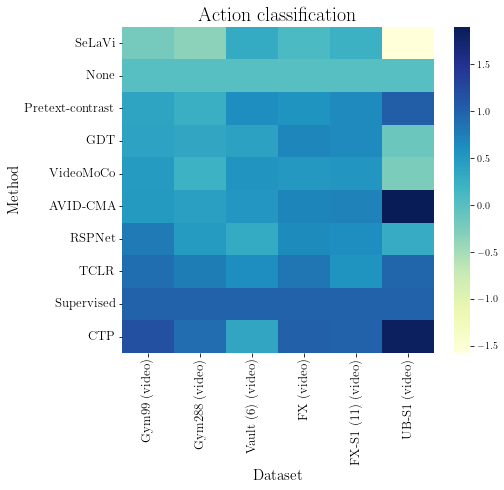

In [17]:
heatmap(norm_df)

### Plot normalized

In [18]:
def heatmap(
        df,
        figsize=(7, 6),
        title="Action classification",
        titlesize=20,
        labelsize=15,
        tickssize=13,
        save=False,
        save_path="../../results/plots/sample.pdf",
        **kwargs,
    ):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    if "cmap" not in kwargs:
        kwargs.update(dict(cmap="YlGnBu"))
    sns.heatmap(df, ax=ax, **kwargs)

    ax.set_title(title, fontsize=titlesize)

    ax.set_xlabel("Dataset")
    ax.set_ylabel("Method")
    
    ax.yaxis.label.set_size(labelsize)
    ax.xaxis.label.set_size(labelsize)

    ax.tick_params(axis='x', labelsize=tickssize)
    ax.tick_params(axis='y', labelsize=tickssize)
    
    if save:
        plt.savefig(save_path, bbox_inches="tight")

    plt.show()

In [19]:
norm_df=(df_video-df_video.min())/(df_video.max()-df_video.min())

In [20]:
annot = df_video.values
annot = np.round(annot, decimals=3)

In [21]:
norm_df.columns = [x.replace(" (video)", "") for x in norm_df.columns]

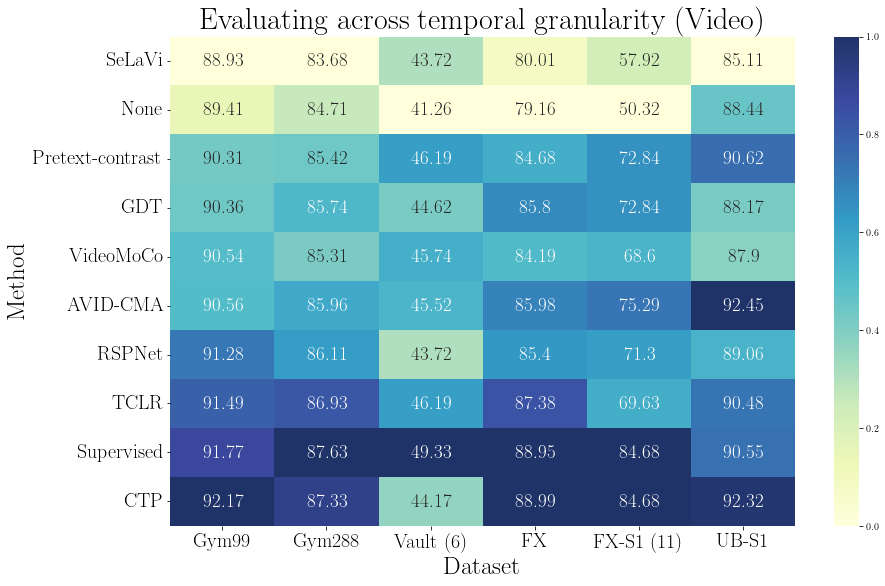

In [22]:
heatmap(
    norm_df,
    figsize=(14, 9),
    title="Evaluating across temporal granularity (Video)",
    titlesize=30,
    labelsize=25,
    tickssize=20,
    save=True,
    save_path="../../results/plots/temporal_granularity_video_v1.pdf",
    cmap="YlGnBu",
    alpha=0.9,
    annot=annot,
    fmt='g',
    annot_kws={"size": 19},
)

### Plot class-wise

In [23]:
df_class = df[[x for x in df.columns if "class" in x or "Method" in x]]
df_class = df_class.set_index(keys=["Method"])

In [24]:
df_class.sort_values("Gym99 (class)", inplace=True)

In [25]:
norm_df=(df_class-df_class.min())/(df_class.max()-df_class.min())

In [26]:
annot = df_class.values
annot = np.round(annot, decimals=3)

In [27]:
norm_df.columns = [x.replace(" (class)", "") for x in norm_df.columns]

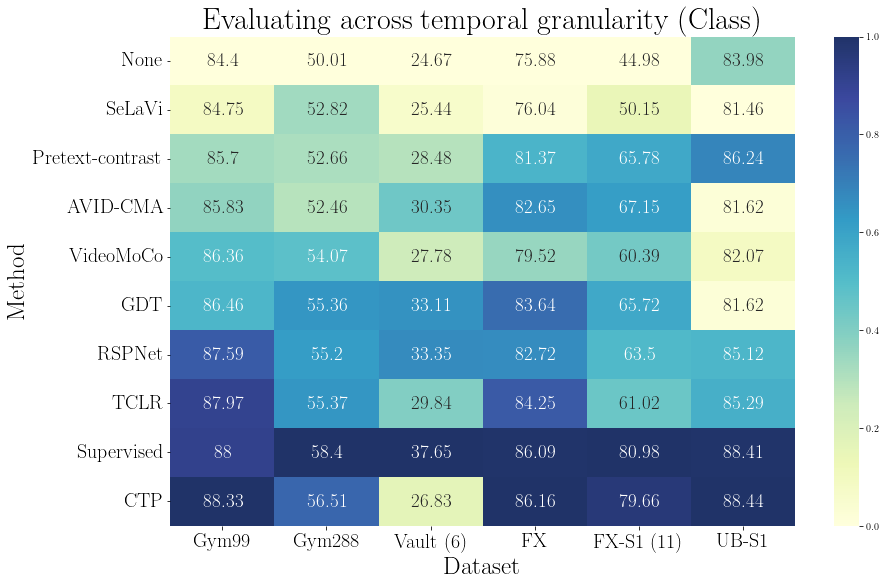

In [28]:
heatmap(
    norm_df,
    figsize=(14, 9),
    title="Evaluating across temporal granularity (Class)",
    titlesize=30,
    labelsize=25,
    tickssize=20,
    save=True,
    save_path="../../results/plots/temporal_granularity_class_v1.pdf",
    cmap="YlGnBu",
    alpha=0.9,
    annot=annot,
    fmt='g',
    annot_kws={"size": 19},
)